# Homework - Machine Learning Unsupervised

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [ ]:
data = pd.read_csv('dataset/flight.csv')
print(data.shape)
data = data.drop('MEMBER_NO', axis=1)
data.head()

(62988, 23)


,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

## General Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62988 non-null  object 
 1   FIRST_FLIGHT_DATE  62988 non-null  object 
 2   GENDER             62985 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   WORK_CITY          60719 non-null  object 
 5   WORK_PROVINCE      59740 non-null  object 
 6   WORK_COUNTRY       62962 non-null  object 
 7   AGE                62568 non-null  float64
 8   LOAD_TIME          62988 non-null  object 
 9   FLIGHT_COUNT       62988 non-null  int64  
 10  BP_SUM             62988 non-null  int64  
 11  SUM_YR_1           62437 non-null  float64
 12  SUM_YR_2           62850 non-null  float64
 13  SEG_KM_SUM         62988 non-null  int64  
 14  LAST_FLIGHT_DATE   62988 non-null  object 
 15  LAST_TO_END        62988 non-null  int64  
 16  AVG_INTERVAL       629

**Terdapat 62988 row data dengan 23 fitur dimana tidak memiliki target/output/label sehingga pada kasus segmentasi ini akan menggunakan jenis Machine Learning Unsupervised - Clustering**<br>

## Numerical Data

In [ ]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

(62988, 14)


,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26


**Dari 23 fitur, terdapat 15 data numerik**

## Non Numerical Data

In [ ]:
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')

(62988, 8)


,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
0,11/2/2006,12/24/2008,Male,.,beijing,CN,3/31/2014,3/31/2014
1,2/19/2007,8/3/2007,Male,NaN,beijing,CN,3/31/2014,3/25/2014
2,2/1/2007,8/30/2007,Male,.,beijing,CN,3/31/2014,3/21/2014


**Dari 23 fitur, terdapat 8 data numerik, jika diamati terdapat 4 fitur bertipe date, yaitu FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE**

# Exploratory Data Analysis (EDA)

## Statistika Deskriptif

**data numerik**

In [ ]:
data_num.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**data non numerik**

In [ ]:
data_cat.describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


## Univariate Analysis Categorical

In [ ]:
WORK_CITY = data['WORK_CITY'].value_counts().reset_index()
WORK_CITY.columns = ['WORK_CITY', 'FREQ']
WORK_CITY['PERCENTAGE'] = round((WORK_CITY['FREQ']/WORK_CITY['FREQ'].sum())*100,2)
WORK_CITY = WORK_CITY[0:10]
WORK_CITY.head(3)

,WORK_CITY,FREQ,PERCENTAGE
0,guangzhou,9386,15.46
1,beijing,7845,12.92
2,shanghai,5001,8.24


In [ ]:
WORK_PROVINCE = data['WORK_PROVINCE'].value_counts().reset_index()
WORK_PROVINCE.columns = ['WORK_PROVINCE', 'FREQ']
WORK_PROVINCE['PERCENTAGE'] = round((WORK_PROVINCE['FREQ']/WORK_PROVINCE['FREQ'].sum())*100,2)
WORK_PROVINCE = WORK_PROVINCE[0:10]
WORK_PROVINCE.head(3)

,WORK_PROVINCE,FREQ,PERCENTAGE
0,guangdong,17509,29.31
1,beijing,8014,13.41
2,shanghai,4998,8.37


In [ ]:
WORK_COUNTRY = data['WORK_COUNTRY'].value_counts().reset_index()
WORK_COUNTRY.columns = ['WORK_COUNTRY', 'FREQ']
WORK_COUNTRY['PERCENTAGE'] = round((WORK_COUNTRY['FREQ']/WORK_COUNTRY['FREQ'].sum())*100,2)
WORK_COUNTRY = WORK_COUNTRY[0:10]
WORK_COUNTRY.head(3)

,WORK_COUNTRY,FREQ,PERCENTAGE
0,CN,57748,91.72
1,HK,991,1.57
2,JP,875,1.39


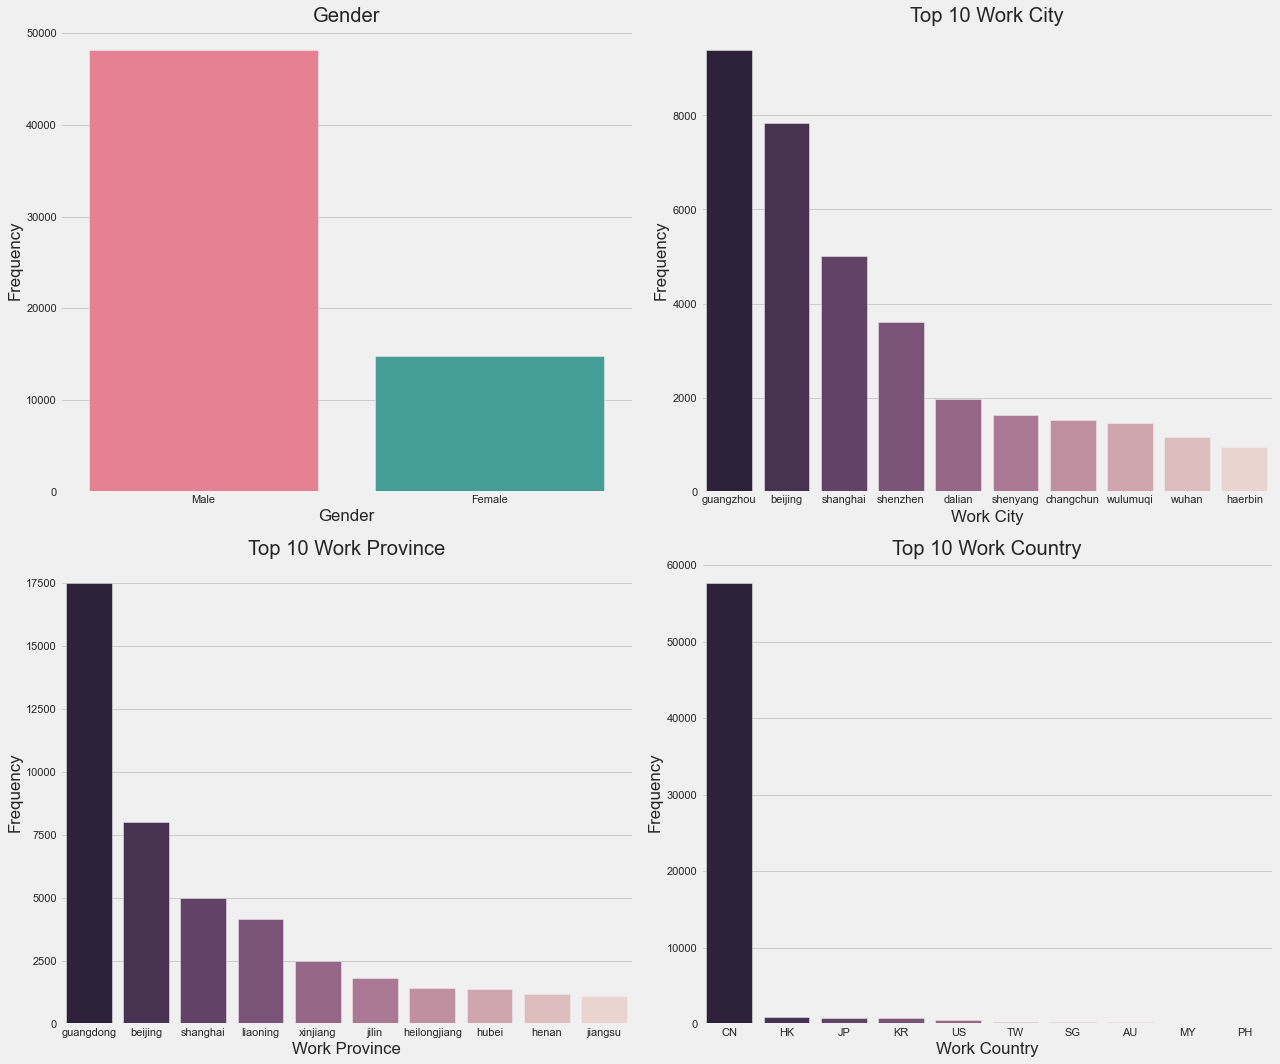

In [ ]:
cat_feature = ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY']

f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.countplot('GENDER',data=data,palette='husl', ax=ax[0,0])
ax[0,0].set_title('Gender')
ax[0,0].set_xlabel('Gender')
ax[0,0].set_ylabel('Frequency')

g = sns.barplot(x='WORK_CITY', y ='FREQ', data=WORK_CITY, ax=ax[0,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[0,1].set_title('Top 10 Work City')
ax[0,1].set_xlabel('Work City')
ax[0,1].set_ylabel('Frequency')

g = sns.barplot(x='WORK_PROVINCE', y ='FREQ', data=WORK_PROVINCE, ax=ax[1,0], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[1,0].set_title('Top 10 Work Province')
ax[1,0].set_xlabel('Work Province')
ax[1,0].set_ylabel('Frequency')

g = sns.barplot(x='WORK_COUNTRY', y ='FREQ', data=WORK_COUNTRY, ax=ax[1,1], palette=sns.cubehelix_palette(reverse=True, start=0, n_colors=10))
ax[1,1].set_title('Top 10 Work Country')
ax[1,1].set_xlabel('Work Country')
ax[1,1].set_ylabel('Frequency')

plt.tight_layout()

## Univariate Analysis Numeric

In [ ]:
data_num.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


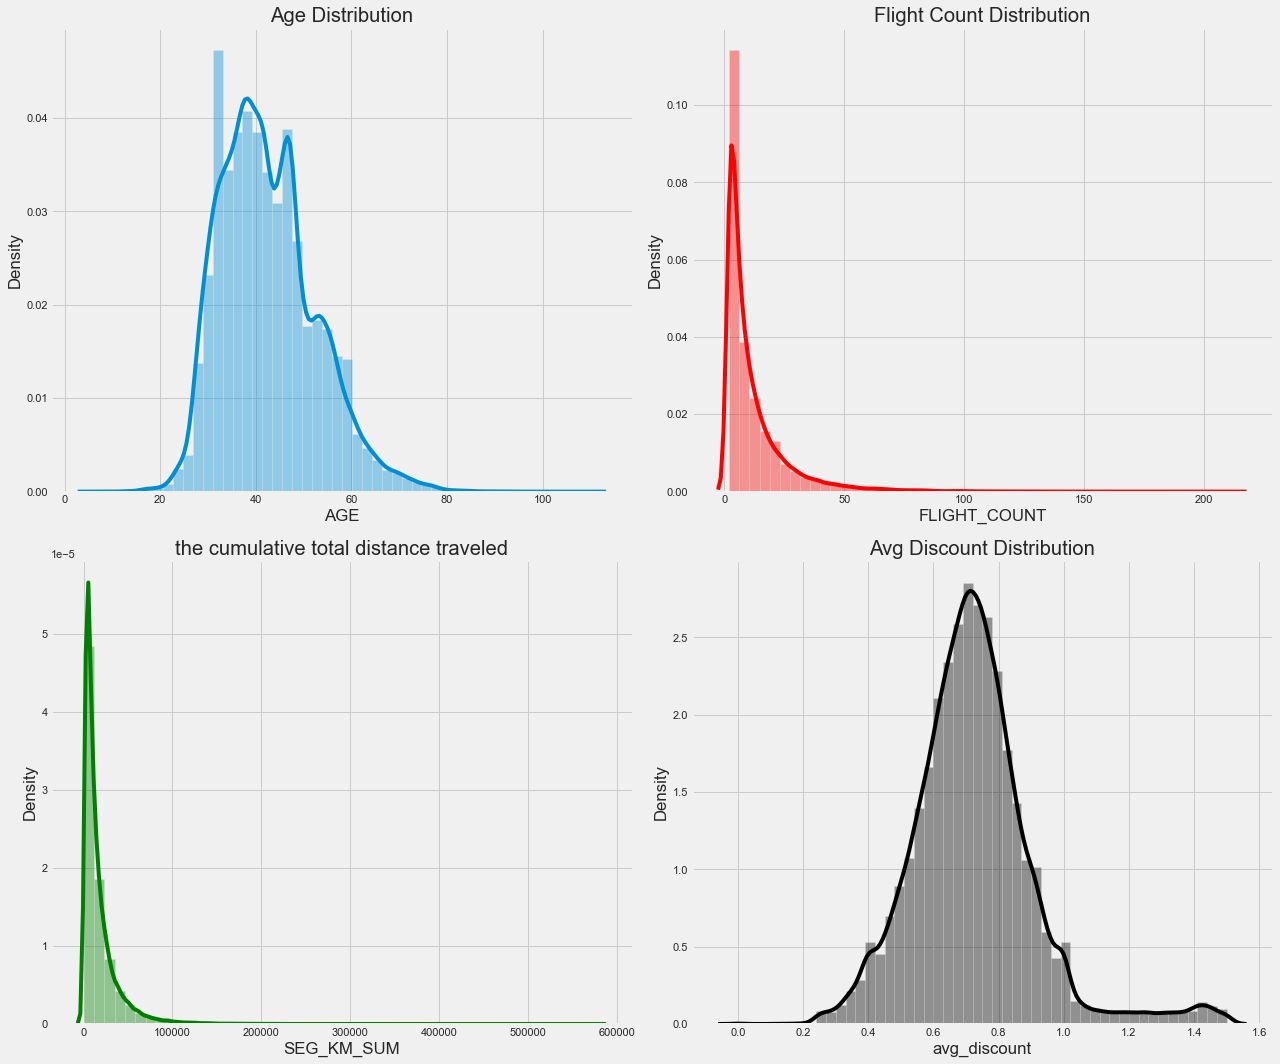

In [ ]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data['AGE'], ax=ax[0,0])
ax[0,0].set_title('Age Distribution')

g = sns.distplot(data['FLIGHT_COUNT'], ax=ax[0,1], color='red')
ax[0,1].set_title('Flight Count Distribution')

g = sns.distplot(data['SEG_KM_SUM'], ax=ax[1,0], color='green')
ax[1,0].set_title('the cumulative total distance traveled')

g = sns.distplot(data['avg_discount'], ax=ax[1,1], color='black')
ax[1,1].set_title('Avg Discount Distribution')

plt.tight_layout()

## Multivariate Analysis

<AxesSubplot:>

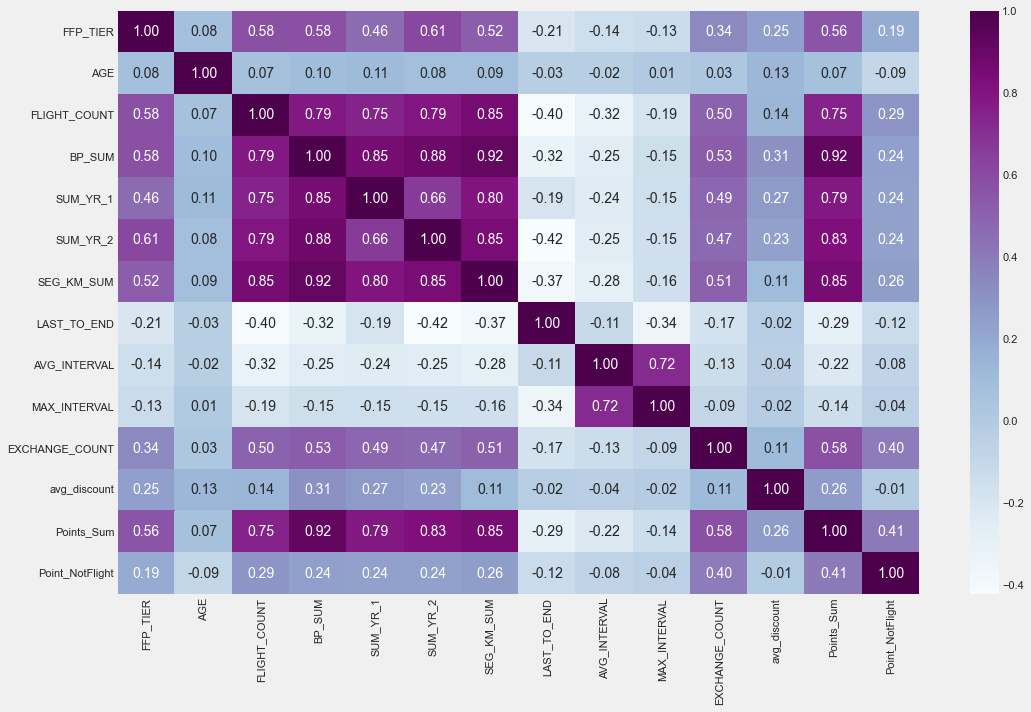

In [ ]:
corr_= data_num.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

# Data Preprocessing

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.16
1,WORK_CITY,2269,3.60
2,SUM_YR_1,551,0.87
3,AGE,420,0.67
4,SUM_YR_2,138,0.22
5,WORK_COUNTRY,26,0.04


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

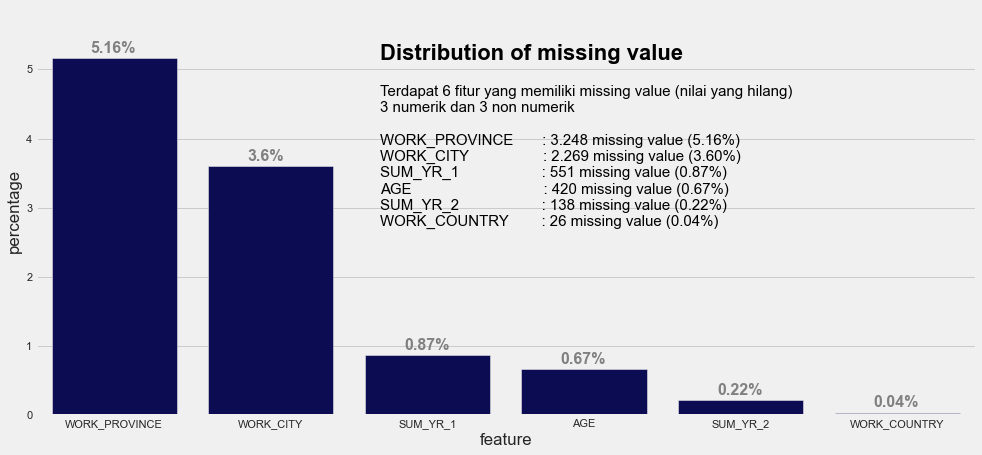

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, color='#00005f')

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.15, v+0.08, str(v)+'%', fontsize = 16, color='gray', fontweight='bold')
    
title = '''
Distribution of missing value
'''
ax.text(1.7,4.8,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''
Terdapat 6 fitur yang memiliki missing value (nilai yang hilang)
3 numerik dan 3 non numerik

WORK_PROVINCE       : 3.248 missing value (5.16%)
WORK_CITY                  : 2.269 missing value (3.60%)
SUM_YR_1                    : 551 missing value (0.87%)
AGE                                : 420 missing value (0.67%)
SUM_YR_2                    : 138 missing value (0.22%)
WORK_COUNTRY        : 26 missing value (0.04%)
'''
ax.text(1.7,2.5,text,horizontalalignment='left',color='black',fontsize=15,fontweight='normal')
    
ax.set_ylim(0,5.9)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

**drop semua missing value karena jumlah untuk missing value bisa dikategorikan masih sedikit**

In [ ]:
data = data.dropna()

## Feature Selection

**berdasarkan referensi beberapa paper, bahwa kita bisa melakukan clustering dengan fitur RFM. Tetapi pada kasus ini, kita akan modifikasi RFM menjadi LRFMC**

**Informasi tentang RFM**<br>
* R – Recency – Keterkinian: Keterkinian pembelian adalah alat penting untuk mengidentifikasi pelanggan yang telah membeli sesuatu baru-baru ini. Pelanggan yang membeli belum lama ini lebih cenderung bereaksi terhadap penawaran baru daripada pelanggan yang pembeliannya terjadi sejak lama. Ini adalah faktor yang paling penting dalam analisis RFM.<br><br>
* F – Frequency – Frekuensi: Frekuensi pembelian muncul setelah keterkinian. Jika pelanggan membeli lebih sering, kemungkinan respons positif lebih tinggi daripada pelanggan yang jarang membeli sesuatu.<br><br>
* M – Monetary Value – Nilai Uang: Omset pembelian atau nilai moneter mengacu pada semua pembelian yang dilakukan oleh pelanggan. Pelanggan yang menghabiskan lebih banyak uang untuk pembelian lebih cenderung menanggapi penawaran daripada pelanggan yang telah menghabiskan jumlah yang lebih kecil


Link referensi paper RFM atau LRFM :
* https://ieeexplore.ieee.org/document/8592638
* https://ieeexplore.ieee.org/abstract/document/9085407
* https://ieeexplore.ieee.org/document/7545236/
* https://ieeexplore.ieee.org/document/7057094/similar

jika tidak punya akses download atau full read bisa akses di link google drive ini :)<br>
https://drive.google.com/drive/folders/1R2zzE8cTf-JwNzP-orxaGDWoQGh2qmAy?usp=sharing

**LRFMC pada Airline customer**<br>
* L =  LOAD_TIME - FFP_DATE.<br>
the number of months between the time of membership and the end of observation window = the end time of observation window - the time of membership<br><br>
* R = LAST_TO_END<br>
the number of months from the last time the customer took the company's aircraft to the end of the observation windows = the time from the last flight to the end of the observation window<br><br>
* F = FLIGHT_COUNT<br>
number of times the customer takes the company's aircraft in the observation window = number of flight in the observation window<br><br>
* M = SEG_KM_SUM<br>
Accumulated flight history of the customer in observation time = total flight kilometers of observation window<br><br>

* C = AVG_DISCOUNT
average value of the discount coefficient corresponding to the passenger space during the observation time = average discount rate


In [ ]:
data = data[data['SUM_YR_1'].notnull()]
data = data[data['SUM_YR_2'].notnull()]
 
 # Only keep records where the fare is non-zero, or the average discount rate is 0 at the same time as the total number of kilometers traveled.
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM']==0) & (data['avg_discount']==0)
data = data[index1 | index2 | index3]
 #Integrate data into the data variable

In [ ]:
data = data[['FFP_DATE','LOAD_TIME', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM','LAST_TO_END']]

data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'])
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'])
 
 
 # data_LRFMC data
data_LRFMC = pd.DataFrame()
# data_LRFMC.columns = ['L', 'R', 'F','M', 'C']
data_LRFMC['L'] =((data['LOAD_TIME'] - data['FFP_DATE']).dt.days/30)
data_LRFMC['R'] = data['LAST_TO_END']
data_LRFMC['F'] = data['FLIGHT_COUNT']
data_LRFMC['M'] = data['SEG_KM_SUM']
data_LRFMC['C'] = data['avg_discount']

## Duplicate Values

In [ ]:
data_LRFMC.duplicated().sum()

82

In [ ]:
data_LRFMC = data_LRFMC.drop_duplicates()

## Outliers

### Log Transformation

In [ ]:
features = list(data_LRFMC)

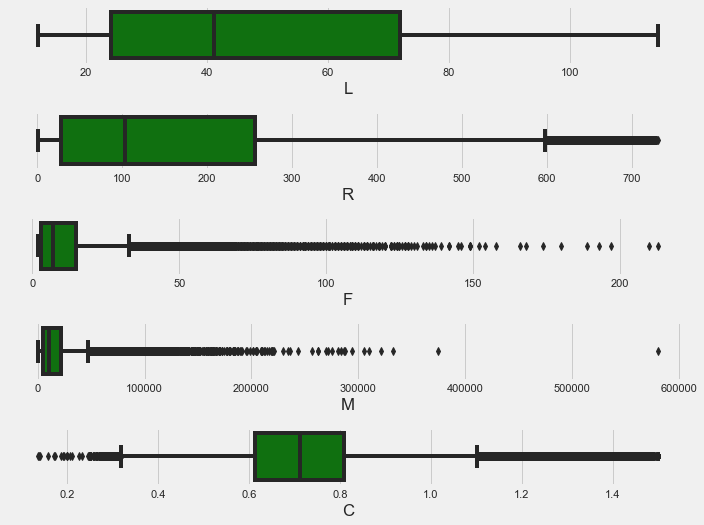

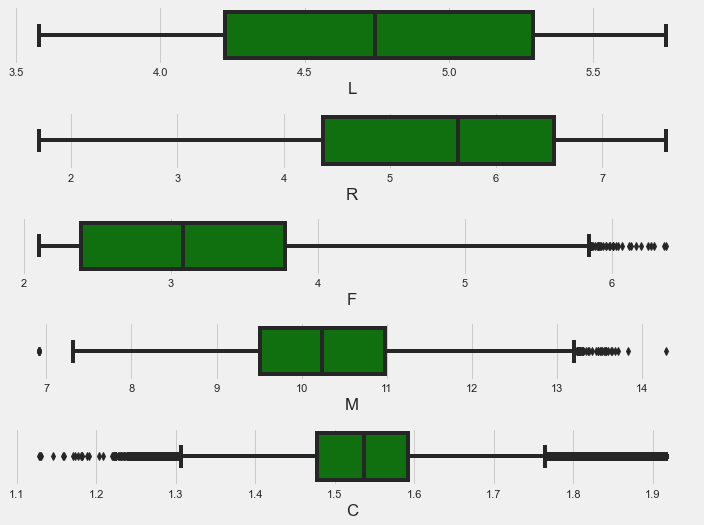

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(data_LRFMC[features[i]],orient='h',color='green')
    plt.tight_layout()   

plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(np.log1p(data_LRFMC[features[i]])+1,orient='h',color='green')
    plt.tight_layout()

In [ ]:
data_LRFMC['L'] = np.log1p(data_LRFMC['L'])
data_LRFMC['R'] = np.log1p(data_LRFMC['R'])
data_LRFMC['F'] = np.log1p(data_LRFMC['F'])
data_LRFMC['M'] = np.log1p(data_LRFMC['M'])
data_LRFMC['C'] = np.log1p(data_LRFMC['C'])

### Remove outlier based on IQR

In [ ]:
len(data_LRFMC)

57933

In [ ]:
Q1 = data_LRFMC['C'].quantile(0.25)
Q3 = data_LRFMC['C'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_LRFMC['C'] >= low_limit) & (data_LRFMC['C'] <= high_limit))
data_LRFMC = data_LRFMC[filtered_entries]

Q1 = data_LRFMC['F'].quantile(0.25)
Q3 = data_LRFMC['F'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_LRFMC['F'] >= low_limit) & (data_LRFMC['F'] <= high_limit))
data_LRFMC = data_LRFMC[filtered_entries]

In [ ]:
len(data_LRFMC)

55159

In [ ]:
LRFMC = data_LRFMC

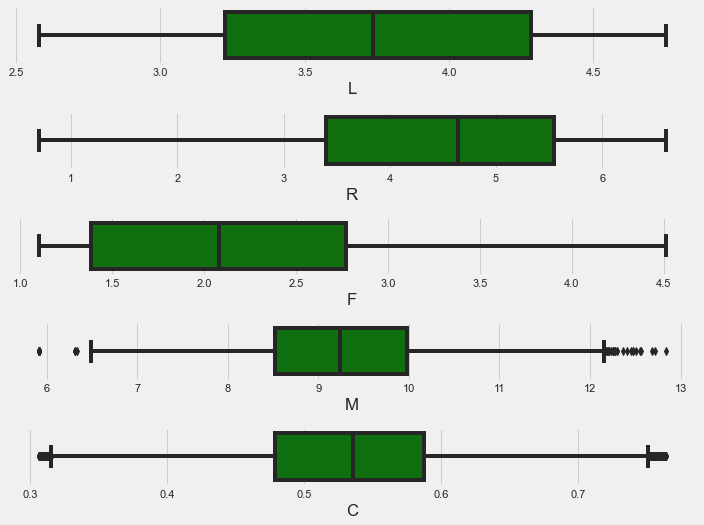

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(7, 1, i+1)
    sns.boxplot(data_LRFMC[features[i]],orient='h',color='green')
    plt.tight_layout()   

## Scaling

In [ ]:
data_LRFMC_std = StandardScaler().fit_transform(data_LRFMC)
scaled_data_LRFMC = pd.DataFrame(data_LRFMC_std, columns=list(data_LRFMC))
scaled_data_LRFMC.head(3)

,L,R,F,M,C
0,0.839516,0.138300,1.219848,3.307384,2.460742
1,0.278786,-2.057033,2.601830,3.328201,1.701094
2,0.178282,-1.105583,2.442673,3.596113,0.044262


# Modeling

## Find the best K

<AxesSubplot:>

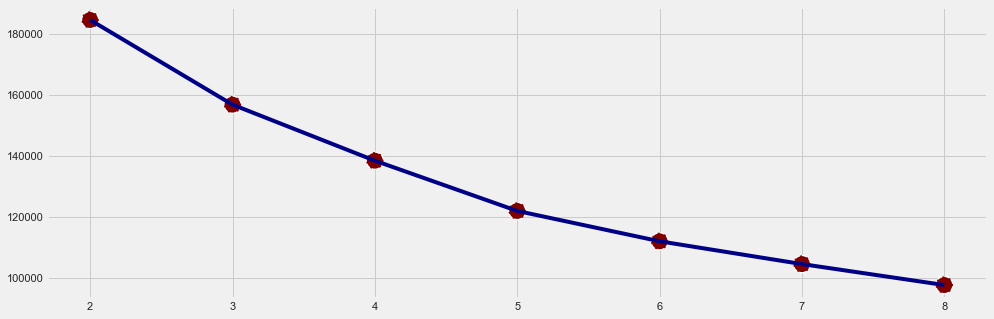

In [ ]:
arr_inertia = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i, random_state=31).fit(scaled_data_LRFMC)
    arr_inertia.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center.
    
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=range(2,9), y=arr_inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,9), y=arr_inertia, s=300, color='#800000',  linestyle='--')


## Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=7).fit(scaled_data_LRFMC)
scaled_data_LRFMC['cluster'] = kmeans.labels_
LRFMC['cluster'] = kmeans.labels_

## Visualiasasi clustering

<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

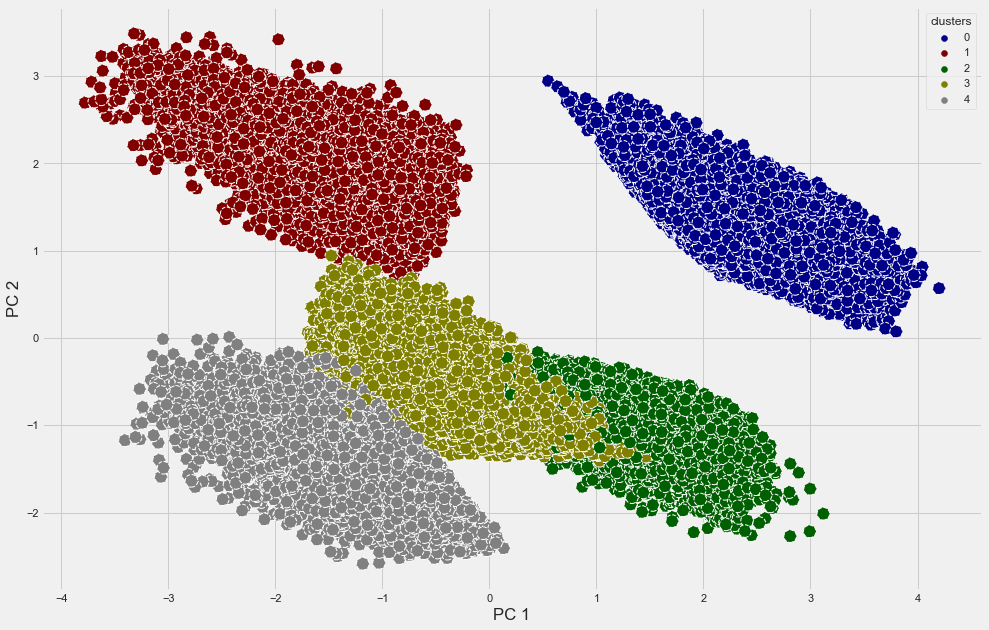

In [ ]:
pca = PCA(n_components=2)

pca.fit(scaled_data_LRFMC)
pcs = pca.transform(scaled_data_LRFMC)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='white',
    linestyle='--',
    data=data_pca,
    palette=['#000087','#800000','#005f00',"#808000",'#808080'],
    s=160,
    ax=ax
)


# Insight - Analysis Clustering

**Re-transform numpy log**

In [ ]:
LRFMC['L'] = np.expm1(LRFMC['L'])
LRFMC['R'] = np.expm1(LRFMC['R'])
LRFMC['F'] = np.expm1(LRFMC['F'])
LRFMC['M'] = np.expm1(LRFMC['M'])
LRFMC['C'] = np.expm1(LRFMC['C'])

In [ ]:
LRFMC.head()

,L,R,F,M,C,cluster
3,68.233333,97.0,23.0,281336.0,1.090870,1
7,48.400000,3.0,73.0,287230.0,0.962070,1
9,45.500000,15.0,64.0,375074.0,0.708010,1
10,40.966667,22.0,43.0,262013.0,0.988658,1
12,89.500000,67.0,29.0,321529.0,0.799127,1


In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
## for Length

def LClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4    
    
## for Coeficient

def CClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
quartiles = LRFMC.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

              L      R     F        M         C  cluster
0.25  24.100000   29.0   3.0   5011.0  0.614250      1.0
0.50  40.966667  103.0   7.0  10337.0  0.708815      2.0
0.75  71.566667  256.0  15.0  21458.5  0.800000      3.0 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()

In [ ]:
LRFMC['L_Quartile'] = LRFMC['L'].apply(LClass, args=('L',quartiles,))
LRFMC['R_Quartile'] = LRFMC['R'].apply(RClass, args=('R',quartiles,))
LRFMC['F_Quartile'] = LRFMC['F'].apply(FMClass, args=('F',quartiles,))
LRFMC['M_Quartile'] = LRFMC['M'].apply(FMClass, args=('M',quartiles,))
LRFMC['C_Quartile'] = LRFMC['C'].apply(CClass, args=('C',quartiles,))

In [ ]:
LRFMC['LRFMCClass'] = LRFMC.L_Quartile.map(str) \
                    + LRFMC.R_Quartile.map(str) \
                    + LRFMC.F_Quartile.map(str) \
                    + LRFMC.M_Quartile.map(str) \
                    + LRFMC.C_Quartile.map(str)

In [ ]:
LRFMC.head(2)

,L,R,F,M,C,cluster,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
3,68.233333,97.0,23.0,281336.0,1.09087,1,3,2,4,4,4,32444
7,48.400000,3.0,73.0,287230.0,0.96207,1,3,1,4,4,4,31444


In [ ]:
cluster_distribution = LRFMC['cluster'].value_counts().reset_index()
cluster_distribution.columns = ['cluster','number of users']
cluster_distribution

,cluster,number of users
0,3,12464
1,4,11447
2,2,11203
3,1,10568
4,0,9477


## Cluster distribution

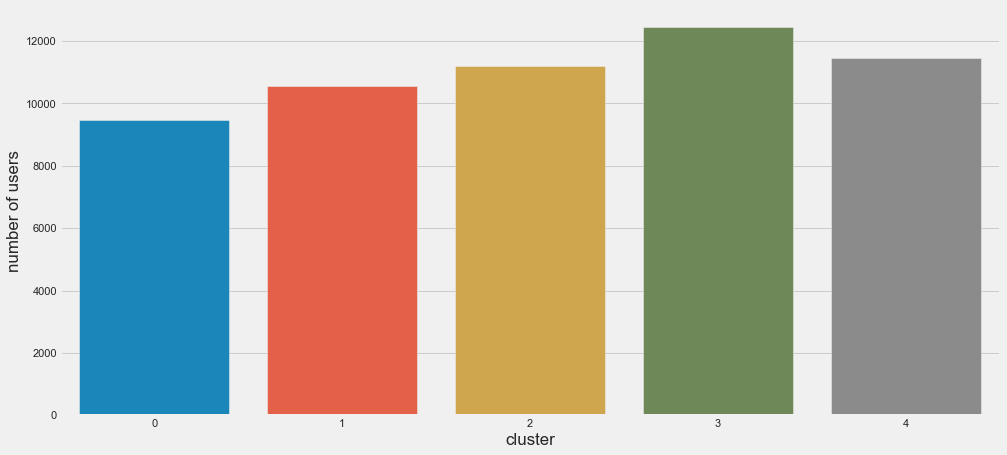

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'cluster',y='number of users',data=cluster_distribution,ax=ax)

x = np.arange(len(cluster_distribution['cluster']))
y = cluster_distribution['number of users']


## Cluster Characteristics

In [ ]:
LRFMC.head(2)

,L,R,F,M,C,cluster,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
3,68.233333,97.0,23.0,281336.0,1.09087,1,3,2,4,4,4,32444
7,48.400000,3.0,73.0,287230.0,0.96207,1,3,1,4,4,4,31444


In [ ]:
median_cluster = LRFMC.groupby('cluster')['L','R','F','M','C'].agg(['median']).reset_index()
median_cluster

,cluster,L,R,F,M,C
,,median,median,median,median,median
0,0,29.400000,238.0,3.0,4807.0,0.535633
1,1,65.866667,15.0,27.0,36940.5,0.733125
2,2,32.600000,299.0,3.0,3924.0,0.824313
3,3,74.433333,112.0,8.0,10799.0,0.697163
4,4,23.400000,56.0,11.0,15935.0,0.705771


In [ ]:
median_cluster.columns = ['cluster', 'L','R','F','M','C']

median_cluster['L_Quartile'] = median_cluster['L'].apply(LClass, args=('L',quartiles,))
median_cluster['R_Quartile'] = median_cluster['R'].apply(RClass, args=('R',quartiles,))
median_cluster['F_Quartile'] = median_cluster['F'].apply(FMClass, args=('F',quartiles,))
median_cluster['M_Quartile'] = median_cluster['M'].apply(FMClass, args=('M',quartiles,))
median_cluster['C_Quartile'] = median_cluster['C'].apply(CClass, args=('C',quartiles,))

median_cluster['LRFMCClass'] = median_cluster.L_Quartile.map(str) \
                                + median_cluster.R_Quartile.map(str) \
                                + median_cluster.F_Quartile.map(str) \
                                + median_cluster.M_Quartile.map(str) \
                                + median_cluster.C_Quartile.map(str)

median_cluster

,cluster,L,R,F,M,C,L_Quartile,R_Quartile,F_Quartile,M_Quartile,C_Quartile,LRFMCClass
0,0,29.400000,238.0,3.0,4807.0,0.535633,2,3,1,1,1,23111
1,1,65.866667,15.0,27.0,36940.5,0.733125,3,1,4,4,3,31443
2,2,32.600000,299.0,3.0,3924.0,0.824313,2,4,1,1,4,24114
3,3,74.433333,112.0,8.0,10799.0,0.697163,4,3,3,3,2,43332
4,4,23.400000,56.0,11.0,15935.0,0.705771,1,2,3,3,2,12332


In [ ]:
# fig,ax = plt.subplots(5,1,figsize=(20,18))

# sns.barplot(x = 'cluster',y='L',data=median_cluster,ax=ax[0])
# sns.barplot(x = 'cluster',y='R',data=median_cluster,ax=ax[1])
# sns.barplot(x = 'cluster',y='F',data=median_cluster,ax=ax[2])
# sns.barplot(x = 'cluster',y='M',data=median_cluster,ax=ax[3])
# sns.barplot(x = 'cluster',y='C',data=median_cluster,ax=ax[4])

In [ ]:
r1=pd.Series(kmeans.labels_).value_counts()
r2=pd.DataFrame(kmeans.cluster_centers_)
r3=pd.Series(['Customer Group 1','Customer Group 2','Customer Group 3','Customer Group 4','Customer Group 5',])

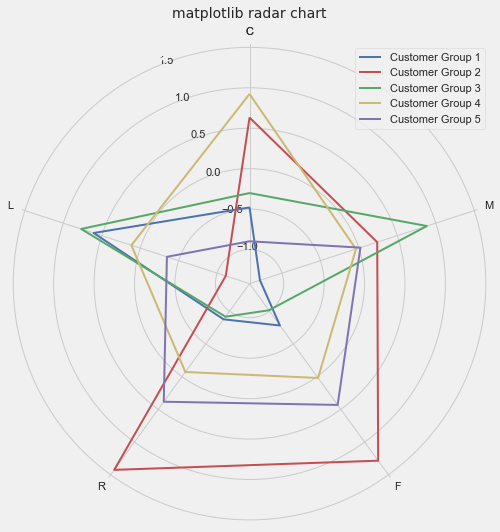

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=2)
ax.plot(angles, y[1], 'r-', linewidth=2)
ax.plot(angles, y[2], 'g-', linewidth=2)
ax.plot(angles, y[3], 'y-', linewidth=2)
ax.plot(angles, y[4], 'm-', linewidth=2)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


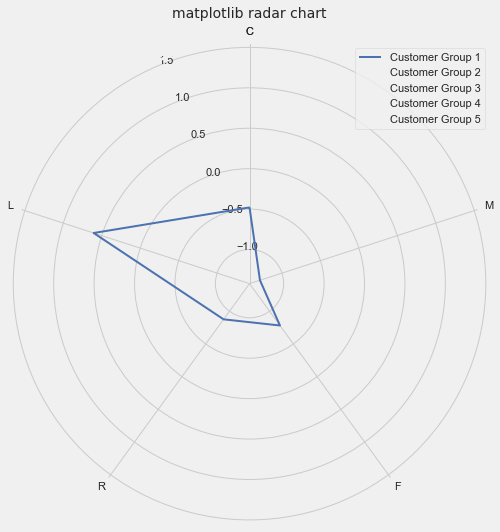

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=2)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


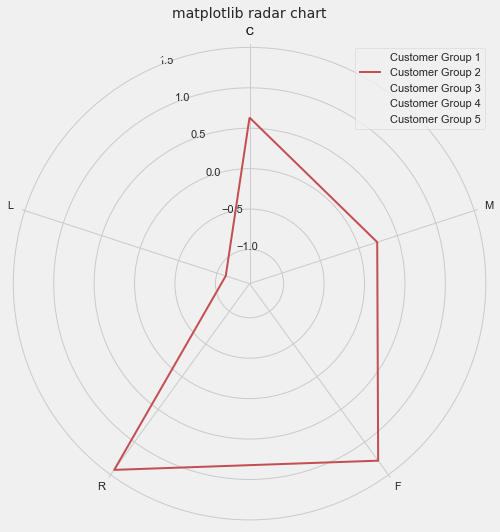

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=2)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


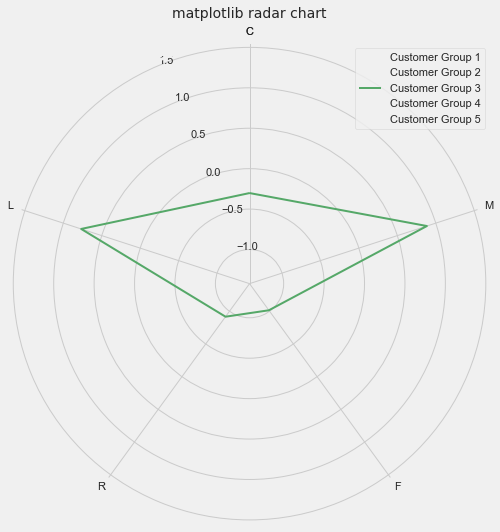

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=2)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


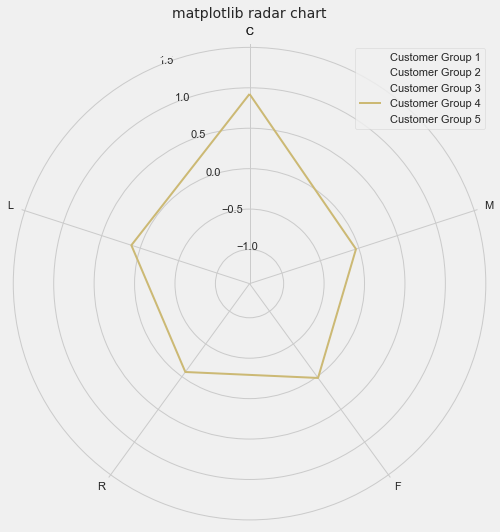

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=2)
ax.plot(angles, y[4], 'm-', linewidth=0)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)


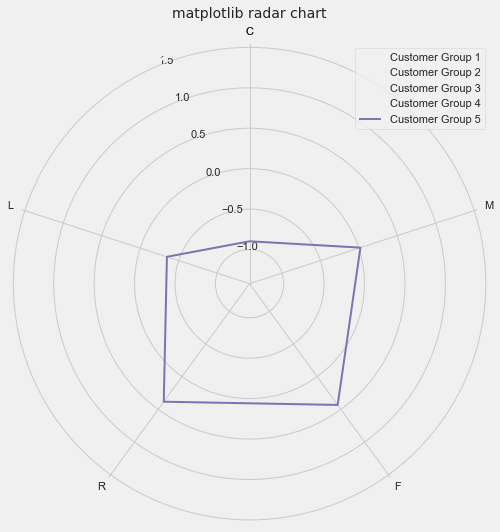

In [ ]:
#Draw radar chart
labels = np.array(['L','R','F','M','C'])#labels
lab = ['','L','R','F','M','C']
dataLenth = 5#Number of data
r4=r2.T
r4.columns=['L','R','F','M','C']
fig = plt.figure()
y=[]
for x in ['L','R','F','M','C']:
    dt= r4[x]
    dt=np.concatenate((dt,[dt[0]]))
    y.append(dt)
ax = fig.add_subplot(111, polar=True)
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
ax.plot(angles, y[0], 'b-', linewidth=0)
ax.plot(angles, y[1], 'r-', linewidth=0)
ax.plot(angles, y[2], 'g-', linewidth=0)
ax.plot(angles, y[3], 'y-', linewidth=0)
ax.plot(angles, y[4], 'm-', linewidth=2)
# plt.rcParams['font.sans-serif']=['SimHei'] 
ax.legend(r3,loc=1)
ax.set_thetagrids(angles * 180/np.pi, lab)
ax.set_title("matplotlib radar chart", va='bottom', fontproperties="DejaVu Sans")
ax.set_theta_zero_location("N")
ax.grid(True)
